In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans


In [ ]:
os.getcwd()
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Import data:

In [ ]:
from house1_data import *

Define a bunch of functions:

In [ ]:
def agg_vector(appliancesData):
    """ Create a matrix containing the data of each appliance """
    appliances_mtrx=np.zeros((len(appliancesData[0]),
                              len(appliancesData)))
    for i in range(0,len(appliancesData)):
        appliances_mtrx[:,i]=appliancesData[i]
        
    aggregate_vector = np.zeros((appliances_mtrx.shape[0],1))
    aggregate_vector = np.sum(appliances_mtrx, axis=1) 
    return aggregate_vector 

""" %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% KMEANS ùùùùùùùùùùùùùùùùùùùùù """
def cluster_data_kmeans(data, n_clusters, plot):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data.reshape(-1, 1) )
    
    change_indices = []
    change_values = []
    labels = kmeans.labels_
    for i in range (0, len(data)-1):
      if (labels[i]!=labels[i+1]):
        change_indices.append(i)
        change_values.append(data[i])
      else:
        pass
    
    change_indices = np.array(change_indices)
    change_values = np.array(change_values)
    
    if (plot==True):
        plt.plot(data)
        plt.scatter(change_indices,change_values, color="red")
    
    return change_indices
#%%
""" ////////////////////////////// MINIBATCH KMEANS :::::::::::::::::::::::::"""
from sklearn.cluster import MiniBatchKMeans
def cluster_data_mini_batch_kmeans(data, n_clusters, plot):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0).fit(data.reshape(-1, 1) )
    
    change_indices = []
    change_values = []
    labels = kmeans.labels_
    for i in range (0, len(data)-1):
      if (labels[i]!=labels[i+1]):
        change_indices.append(i)
        change_values.append(data[i])
      else:
        pass
    
    change_indices = np.array(change_indices)
    change_values = np.array(change_values)
    
    if (plot==True):
        plt.plot(data)
        plt.scatter(change_indices,change_values, color="red")
    
    return change_indices
#%%
""" ///////////////////////////////////////// MEAN SHIFT ////////////////////// """
from sklearn.cluster import MeanShift, estimate_bandwidth

def cluster_data_meanShift(data, bandwidth, plot):
    # bandwidth = estimate_bandwidth(data.reshape(-1,1), quantile=0.2, n_samples=500)
    
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data.reshape(-1,1))
    labels = ms.labels_
    change_indices = []
    change_values = []
    
    for i in range (0, len(data)-1):
      if (labels[i]!=labels[i+1]):
        change_indices.append(i)
        change_values.append(data[i])
      else:
        pass
    
    change_indices = np.array(change_indices)
    change_values = np.array(change_values)
    
    if (plot == True):
        plt.plot(data)
        plt.scatter(change_indices,change_values, color="red")
    print(np.unique(labels))
    
    return change_indices

def find_events(X, n_clusters, plot):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X.reshape(-1, 1) )
    
    change_indices = []
    change_values = []
    labels = kmeans.labels_
    for i in range (0, len(X)-1):
      if (labels[i]!=labels[i+1]):
        change_indices.append(i)
        change_values.append(X[i])
      else:
        pass
    
    change_indices = np.array(change_indices)
    change_values = np.array(change_values)
    if (plot==True):
        plt.plot(X)
        plt.scatter(change_indices,change_values, color="red")
    
    return change_indices

"""/////////////////////////////////////// EVALUATION METHOD ////////////////////////// """


def evaluate(test_indices):
    TP=0
    FN=0
    for i in gt_indices:
        if i in test_indices:
            TP+=1
        else:
            FN+=1
    
    FP=0
    for i in test_indices:
        if i in gt_indices:
            pass
        else:
            FP+=1
    TN = test_indices - (TP+FN+FP)
    return TP,FP,TN,FN

def precision(tp, fp):
    return tp/(tp+fp)

def recall (tp, fn):
    return tp/(tp+fn)

def F1 (precision, recall):
    return 2 * (precision * recall) / (precision + recall)


Print loads' names:

In [ ]:
app_names = redd_house1_names
print(app_names)

['oven', 'fridge', 'dish.W', 'kitch', 'lights', 'washing.M', 'mic', 'bath gfi', 'stove']


Find ground truth events for each load:

In [ ]:
# retrieve gt data 
ov = redd_house1_appliances[0].to_numpy()
fr = redd_house1_appliances[1].to_numpy()
dw = redd_house1_appliances[2].to_numpy()
kt = redd_house1_appliances[3].to_numpy()
lights = redd_house1_appliances[4].to_numpy()
wm = redd_house1_appliances[5].to_numpy()
mic = redd_house1_appliances[6].to_numpy()
bath = redd_house1_appliances[7].to_numpy()
stove = redd_house1_appliances[8].to_numpy()
#%%
# filter gt data 
def median(aggregate_vector):
    window = 15
    s = pd.Series(aggregate_vector)
    median_df = s.rolling(window).median()
    return median_df.fillna(0).to_numpy()

ov_filt = median(ov)
fr_filt = median(fr)
dw_filt = median(dw)
# kt_filt = median(kt) add a median window parameter
# lights_filt = median(lights)
wm_filt = median(wm)
mic_filt = median(mic)
bath_filt = median(bath)
# stove_filt = median(stove) present only one time, not sufficent for splitting


# find events in gt

ov_gt_indices = find_events(ov_filt, n_clusters=2, plot=False)
fr_gt_indices = find_events(fr_filt, n_clusters=2, plot=False)
dw_gt_indices = find_events(dw_filt, n_clusters=4, plot=False)
# kt_gt_indices = find_events(kt_filt, n_clusters=2, plot=True)
# lights_gt_indices = find_events(lights_filt, n_clusters=4, plot=True)
wm_gt_indices = find_events(wm_filt, n_clusters=2, plot=False)
mic_gt_indices = find_events(mic_filt, n_clusters=2, plot=False)
bath_gt_indices = find_events(bath_filt, n_clusters=2, plot=False)
# stove_gt_indices = find_events(stove_filt, n_clusters=2, plot=True)

#%%
# create one vector which contains all the gt events indices

gt_indices = np.concatenate((ov_gt_indices, fr_gt_indices,
                            dw_gt_indices, wm_gt_indices,
                            mic_gt_indices, bath_gt_indices))

gt_indices = np.sort(gt_indices)

Create aggregate vector:

In [ ]:
agg = ov_filt + fr_filt + dw_filt + wm_filt + mic_filt + bath_filt

K-means evaluation:

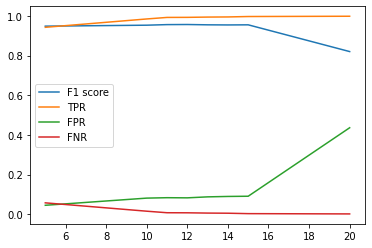

In [ ]:
n_clusters = [5,10,11,12,13,14,15,20]
f1=[]
TP=[]
FP=[]
FN=[]
data = agg
plot = False
for i in n_clusters:
    test_indices = cluster_data_kmeans(data, i, plot)
    tp,fp,tn,fn = evaluate(test_indices)
    x = F1(precision(tp, fp) , recall (tp, fn))
    f1.append(x)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)

maxF1_kmeans = f1[np.argmax(f1)]    
plt.plot(n_clusters,f1, label="F1 score")
plt.plot(n_clusters, np.array(TP)/len(gt_indices), label="TPR")
plt.plot(n_clusters,np.array(FP)/len(gt_indices), label="FPR")
plt.plot(n_clusters,np.array(FN)/len(gt_indices), label="FNR")
plt.legend()

Mini-batch Kmeans evalutation:

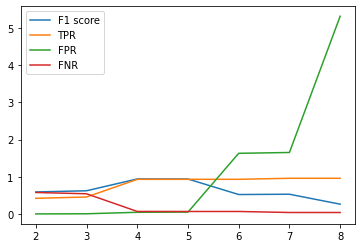

In [ ]:
n_clusters = [2,3,4,5,6,7,8]
f1=[]
TP=[]
FP=[]
FN=[]
data = agg
plot = False
for i in n_clusters:
    test_indices = cluster_data_mini_batch_kmeans(data, i, plot)
    tp,fp,tn,fn = evaluate(test_indices)
    x = F1(precision(tp, fp) , recall (tp, fn))
    f1.append(x)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)

maxF1_kmeans = f1[np.argmax(f1)]    
plt.plot(n_clusters,f1, label="F1 score")
plt.plot(n_clusters, np.array(TP)/len(gt_indices), label="TPR")
plt.plot(n_clusters,np.array(FP)/len(gt_indices), label="FPR")
plt.plot(n_clusters,np.array(FN)/len(gt_indices), label="FNR")
plt.legend()

Mean shift evaluation:

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0 1 2 3 4 5 6]


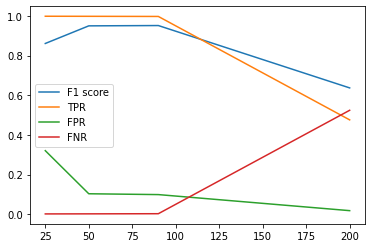

In [ ]:
data = agg
bandwidth = [25,50,90,200]
# bandwidth = [50,80,90,100]

f1=[]
TP=[]
FP=[]
FN=[]
for i in bandwidth:
    meanShift_indices = cluster_data_meanShift(data, i, plot=False)
    tp,fp,tn,fn = evaluate(meanShift_indices)
    x = F1(precision(tp, fp) , recall (tp, fn))
    f1.append(x)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)

# maxF1_kmeans = f1[np.argmax(f1)] 
plt.plot(bandwidth,f1, label="F1 score")
plt.plot(bandwidth, np.array(TP)/len(gt_indices), label="TPR")
plt.plot(bandwidth,np.array(FP)/len(gt_indices), label="FPR")
plt.plot(bandwidth,np.array(FN)/len(gt_indices), label="FNR")
plt.legend()

Time complexity:

In [ ]:
import time 
data =agg
plot= False
n_clusters = 7
start = time.perf_counter()
indices = cluster_data_mini_batch_kmeans(data, n_clusters, plot=False)
print(time.perf_counter()-start)

0.23968814399995608


Memory complexity:

In [ ]:
#!pip install memory_profiler

from memory_profiler import profile
data =agg
plot= False
bandwidth = 90
@profile
def my_func():
    indices = cluster_data_meanShift(data, bandwidth, plot=False)
    return indices

my_func()

ERROR: Could not find file <ipython-input-14-d73cdce4d4a9>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


array([   282,    334,    881, ..., 744601, 744901, 745781])